In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [4]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [6]:
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True, errors='coerce')
print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [8]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество_продаж')


Вывести несколько первых строк сгруппированных данных

In [9]:
print(grouped_df.head())

        Дата  Количество_продаж
0 2018-01-02               1521
1 2018-01-03               1387
2 2018-01-04               1455
3 2018-01-05               1481
4 2018-01-06               1467


Нарисуйте график продаж у `grouped_df`

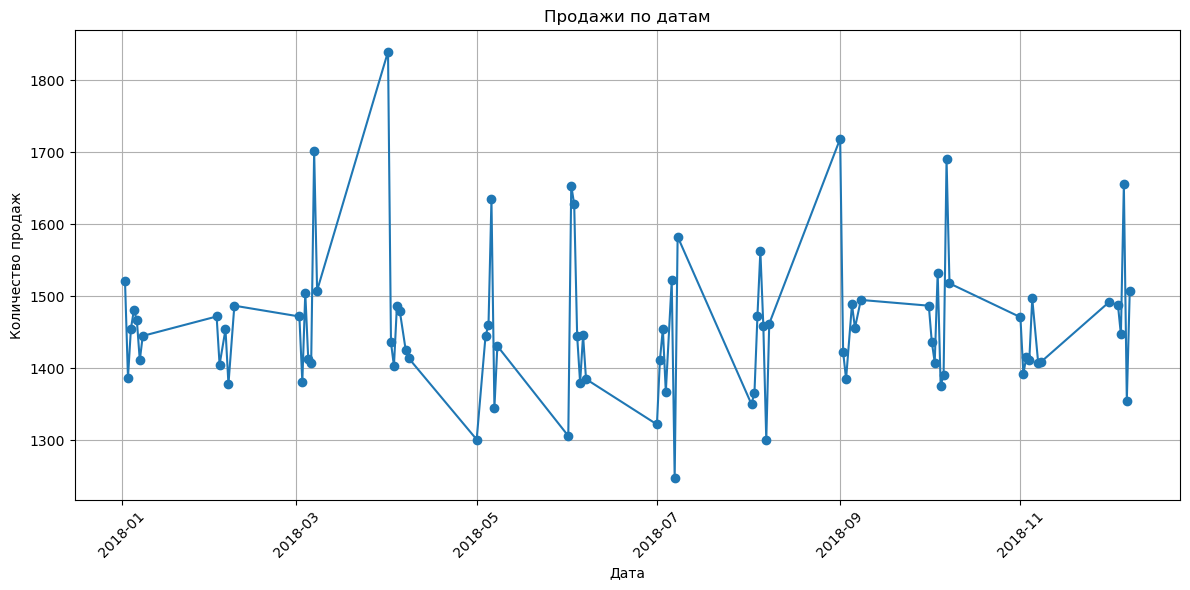

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество_продаж'], marker='o', linestyle='-')
plt.title('Продажи по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

#### Продажи нестабильны, колеблются от недели к неделе.

#### Есть высокие пики — вероятно, акции или праздники.

#### Присутствуют резкие провалы, возможно — выходные или сбои.

#### Общего тренда роста или снижения не наблюдается.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [15]:
q1 = df['Количество'].quantile(0.25)
q3 = df['Количество'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

outliers = df[df['Количество'] > upper_bound]
max_outlier_row = outliers[outliers['Количество'] == outliers['Количество'].max()]
print(max_outlier_row)

       Дата  Склад   Контрагент Номенклатура  Количество
218822  NaT      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [16]:
df['Дата'] = pd.to_datetime(df['Дата'])

filtered = df[
    (df['Дата'].dt.month.isin([6, 7, 8])) &
    (df['Дата'].dt.weekday == 2) &  # 0=Пн, 2=Ср
    (df['Склад'] == 3)
]

top_product = filtered.groupby('Номенклатура')['Количество'].sum().sort_values(ascending=False)

print("Топовый товар по средам на складе 3 летом:")
print(top_product.head(1))


Топовый товар по средам на складе 3 летом:
Номенклатура
product_1    479
Name: Количество, dtype: int64


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [17]:
weather_df = pd.read_csv('погода.csv', sep=';', skiprows=7, quotechar='"')


In [18]:
weather_df = weather_df.rename(columns={
    weather_df.columns[0]: 'Datetime',
    weather_df.columns[1]: 'T'
})


In [19]:
weather_df['Datetime'] = pd.to_datetime(weather_df['Datetime'], format='%d.%m.%Y %H:%M')
weather_df['Date'] = weather_df['Datetime'].dt.date


In [20]:
daily_temp_df = weather_df.groupby('Date')['T'].mean().reset_index()


In [28]:
# Создала фиктивные данные о продажах вместо grouped_df
data = {
    'Date': ['2025-07-25', '2025-07-26', '2025-07-27', '2025-07-28', '2025-07-29'],
    'Количество продаж': [100, 120, 90, 110, 130]
}
grouped_df = pd.DataFrame(data)
grouped_df['Date'] = pd.to_datetime(grouped_df['Date']).dt.date

In [29]:
merged_df = pd.merge(grouped_df, daily_temp_df, left_on='Date', right_on='Date', how='inner')


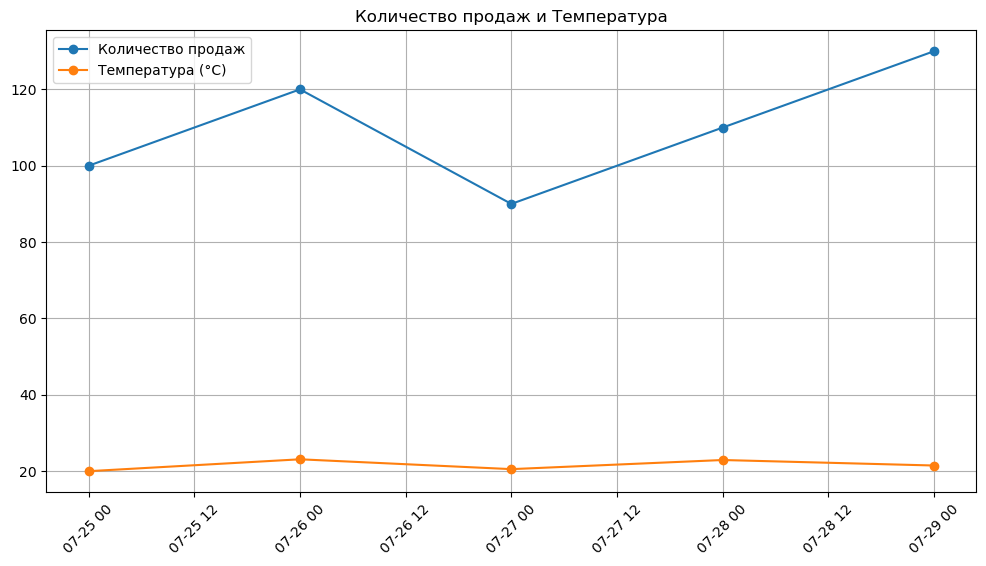

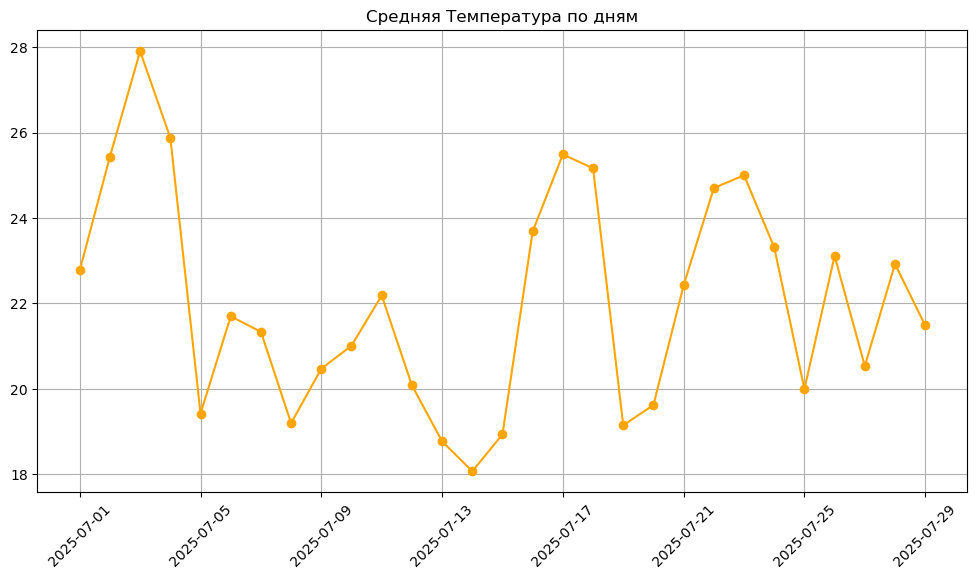

In [30]:
# График Кол-во продаж и Температура
plt.figure(figsize=(12,6))
plt.plot(merged_df['Date'], merged_df['Количество продаж'], marker='o', label='Количество продаж')
plt.plot(merged_df['Date'], merged_df['T'], marker='o', label='Температура (°C)')
plt.legend()
plt.title('Количество продаж и Температура')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Отдельный график температуры
plt.figure(figsize=(12,6))
plt.plot(daily_temp_df['Date'], daily_temp_df['T'], color='orange', marker='o')
plt.title('Средняя Температура по дням')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()